<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/cma_es_ask_tell_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!pip install optuna > log.txt

In [101]:
import optuna
from tqdm import tqdm_notebook as tqdm
sampler = optuna.samplers.CmaEsSampler()
study = optuna.create_study(sampler=sampler)

[I 2021-04-30 01:17:55,669] A new study created in memory with name: no-name-3bea70de-1ffa-40ae-9906-2cdbc3636bd2


In [102]:
history = {}
for i in tqdm(range(100)):
  trial = study.ask()
  x = trial.suggest_float("x", -1, 1)
  y = trial.suggest_float("y", -1, 1)
  loss = x ** 2 + y**2
  study.tell(trial,loss)
  history[i] = {'x':x,'y':y,'loss':loss}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [103]:
history[99]

{'loss': 0.0008100353867585829,
 'x': 0.005957152065881519,
 'y': -0.02783069754825679}

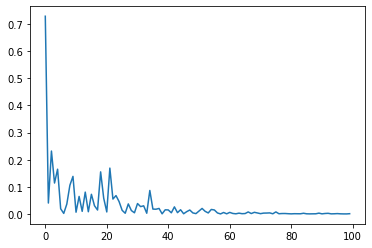

In [104]:
import matplotlib.pyplot as plt
plt.plot([v['loss'] for k,v in history.items()])